In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
import sklearn
print(sklearn.__version__)

1.2.2


In [3]:
import pickle
print(pickle.format_version)

4.0


In [4]:
WORKING_DIR = "/content/drive/MyDrive/Colab Notebooks"

print(WORKING_DIR)

/content/drive/MyDrive/Colab Notebooks


In [5]:
BASE_DIR = "/content/drive/MyDrive"

print(BASE_DIR)

/content/drive/MyDrive


In [6]:
df = pd.read_csv(os.path.join(WORKING_DIR,"Salary Predictions.csv"))

In [7]:
df

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,KATHERINE,ALSDON,F,6-28-2011,01-07-2016,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10
2635,LOUISE,ALTARAS,F,1-14-2014,01-07-2016,Analyst,23.0,45758,IT,17.0,13.0,2.0,0
2636,RENEE,ALVINO,F,1-23-2014,01-07-2016,Analyst,21.0,47315,Web,29.0,1.0,5.0,0
2637,TERI,ANASTASIO,F,3-17-2014,01-07-2016,Analyst,24.0,45172,Web,23.0,7.0,3.0,1


In [8]:
df = df.drop(columns = ['FIRST NAME', 'LAST NAME','SEX', 'DOJ', 'CURRENT DATE'])
df

,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3
...,...,...,...,...,...,...,...,...
2634,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10
2635,Analyst,23.0,45758,IT,17.0,13.0,2.0,0
2636,Analyst,21.0,47315,Web,29.0,1.0,5.0,0
2637,Analyst,24.0,45172,Web,23.0,7.0,3.0,1


In [9]:
df.isnull().sum()


DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
dtype: int64

In [12]:
df.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2632.000000,2632.000000,2632.000000,2632.000000,2632.000000,2632.000000
mean,24.753799,58114.079787,22.497720,7.502280,3.486702,1.562310
std,3.904332,36861.179041,4.602397,4.602397,1.114081,2.725625
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46783.000000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,51390.750000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


                       AGE    SALARY  LEAVES USED  LEAVES REMAINING   RATINGS  \
AGE               1.000000  0.871904     0.007287         -0.007287  0.039005   
SALARY            0.871904  1.000000     0.006902         -0.006902  0.021656   
LEAVES USED       0.007287  0.006902     1.000000         -1.000000  0.004256   
LEAVES REMAINING -0.007287 -0.006902    -1.000000          1.000000 -0.004256   
RATINGS           0.039005  0.021656     0.004256         -0.004256  1.000000   
PAST EXP          0.903671  0.854016     0.007950         -0.007950  0.042392   

                  PAST EXP  
AGE               0.903671  
SALARY            0.854016  
LEAVES USED       0.007950  
LEAVES REMAINING -0.007950  
RATINGS           0.042392  
PAST EXP          1.000000  


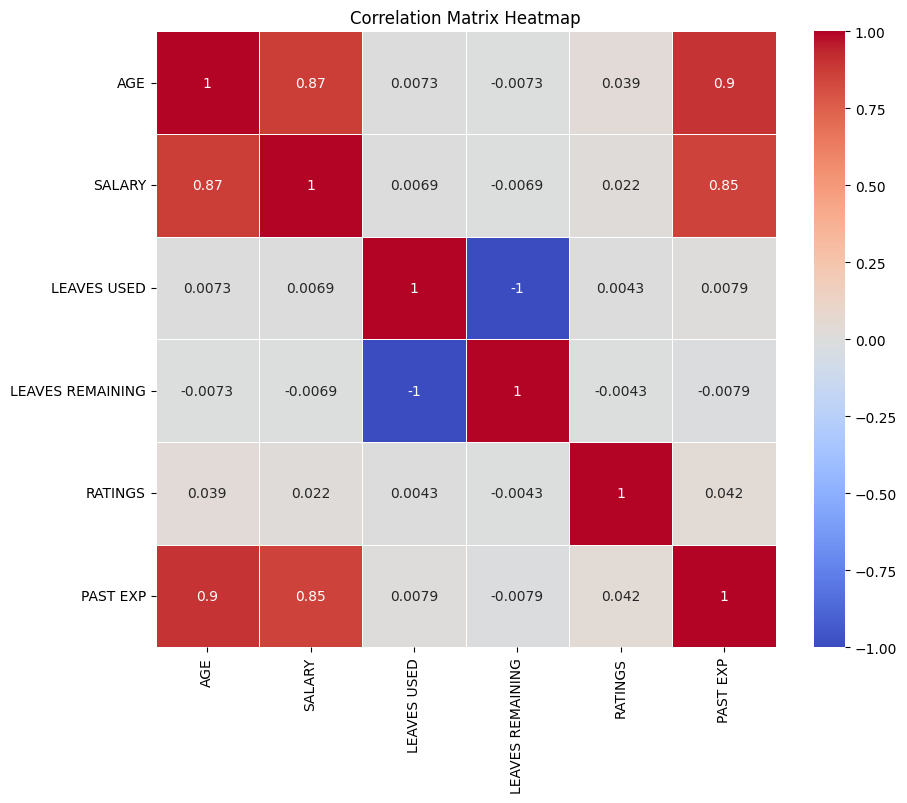

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [13]:
unique_des = df['DESIGNATION'].unique()
print(f"All designations in the dataset: {unique_des}")

unique_unit = df['UNIT'].unique()
print(f"All units in the dataset: {unique_unit}")

All designations in the dataset: ['Analyst' 'Senior Analyst' 'Associate' 'Senior Manager' 'Manager'
 'Director']
All units in the dataset: ['Finance' 'IT' 'Marketing' 'Operations' 'Web' 'Management']


In [14]:
# can use labelencoder but just wanted to be in control

des_map = {"Analyst": 1, "Senior Analyst": 2, "Associate": 3, "Senior Manager": 4, "Manager": 5, "Director": 6}

df['DESIGNATION'] = df['DESIGNATION'].map(des_map)

unit_map = {"Finance": 1, "IT": 2, "Marketing": 3, "Operations": 4, "Web": 5, "Management": 6}

df['UNIT'] = df['UNIT'].map(unit_map)

df

<ipython-input-14-eb290512958f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DESIGNATION'] = df['DESIGNATION'].map(des_map)
<ipython-input-14-eb290512958f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UNIT'] = df['UNIT'].map(unit_map)


,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,1,21.0,44570,1,24.0,6.0,2.0,0
2,1,21.0,40955,1,23.0,7.0,3.0,0
3,1,22.0,45550,2,22.0,8.0,3.0,0
5,1,22.0,48736,3,20.0,10.0,4.0,0
6,1,22.0,40339,3,19.0,11.0,5.0,0
...,...,...,...,...,...,...,...,...
2634,4,36.0,185977,6,15.0,15.0,5.0,10
2635,1,23.0,45758,2,17.0,13.0,2.0,0
2636,1,21.0,47315,5,29.0,1.0,5.0,0
2637,1,24.0,45172,5,23.0,7.0,3.0,1


                  DESIGNATION       AGE    SALARY      UNIT  LEAVES USED  \
DESIGNATION          1.000000  0.912423  0.882359 -0.009605     0.021094   
AGE                  0.912423  1.000000  0.871904 -0.005031     0.007287   
SALARY               0.882359  0.871904  1.000000 -0.007334     0.006902   
UNIT                -0.009605 -0.005031 -0.007334  1.000000     0.019071   
LEAVES USED          0.021094  0.007287  0.006902  0.019071     1.000000   
LEAVES REMAINING    -0.021094 -0.007287 -0.006902 -0.019071    -1.000000   
RATINGS              0.015881  0.039005  0.021656  0.017646     0.004256   
PAST EXP             0.818626  0.903671  0.854016 -0.012503     0.007950   

                  LEAVES REMAINING   RATINGS  PAST EXP  
DESIGNATION              -0.021094  0.015881  0.818626  
AGE                      -0.007287  0.039005  0.903671  
SALARY                   -0.006902  0.021656  0.854016  
UNIT                     -0.019071  0.017646 -0.012503  
LEAVES USED              -1.00

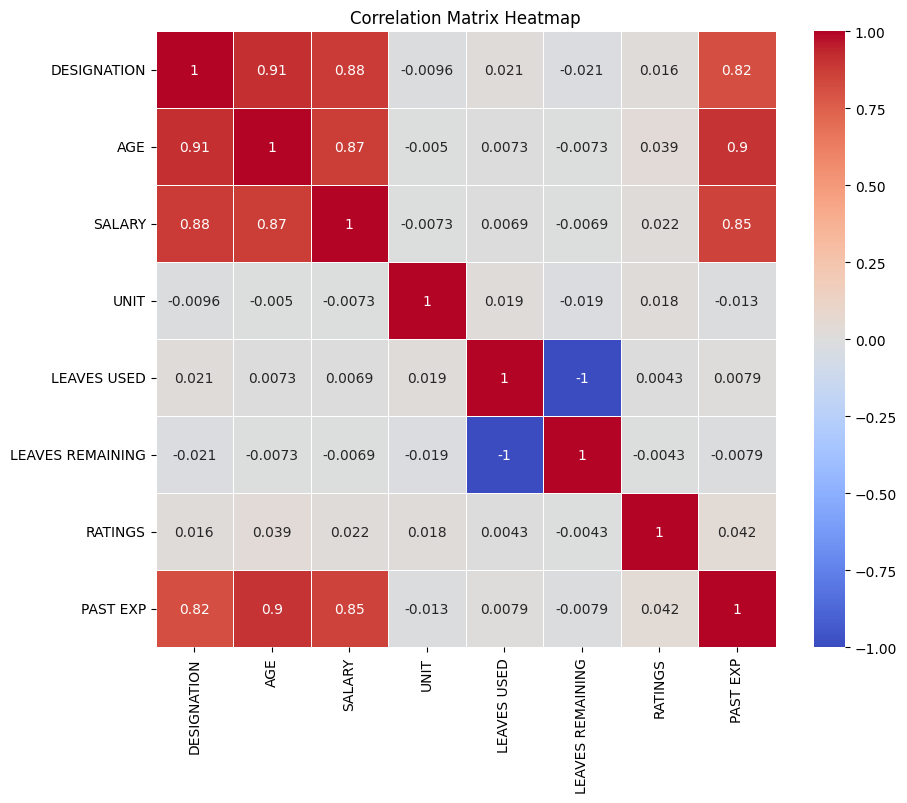

In [ ]:
# CHECKING CORRELATION FOR ALL THE ABOVE FEATURES IN DF
correlation_matrix = df.corr()
print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
df['DESIGNATION'].value_counts()

DESIGNATION
1    1944
2     356
3     158
5      81
4      61
6      32
Name: count, dtype: int64

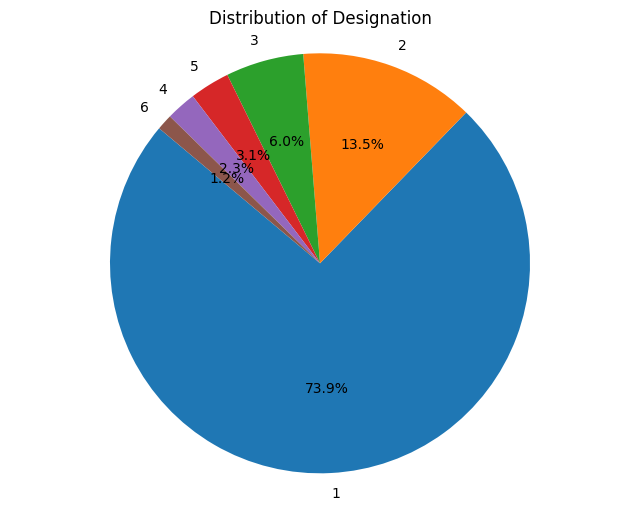

In [ ]:
# Count the frequency of each category in the 'field' column
field_counts = df['DESIGNATION'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(field_counts, labels=field_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Designation')
plt.axis('equal')  # pie is drawn as a circle.
plt.show()


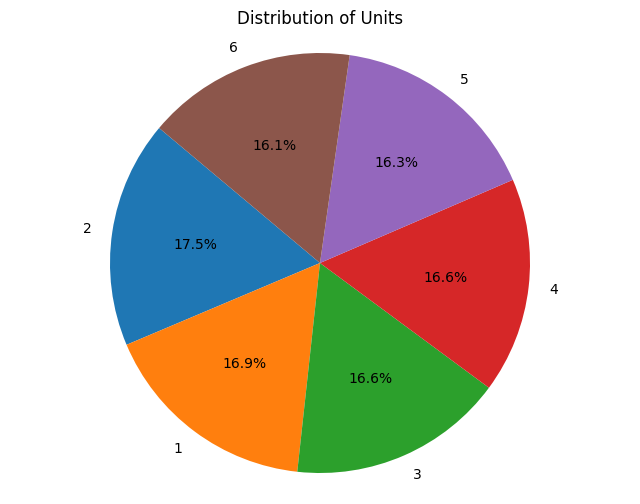

In [ ]:

field_counts = df['UNIT'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(field_counts, labels=field_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Units')
plt.axis('equal')
plt.show()


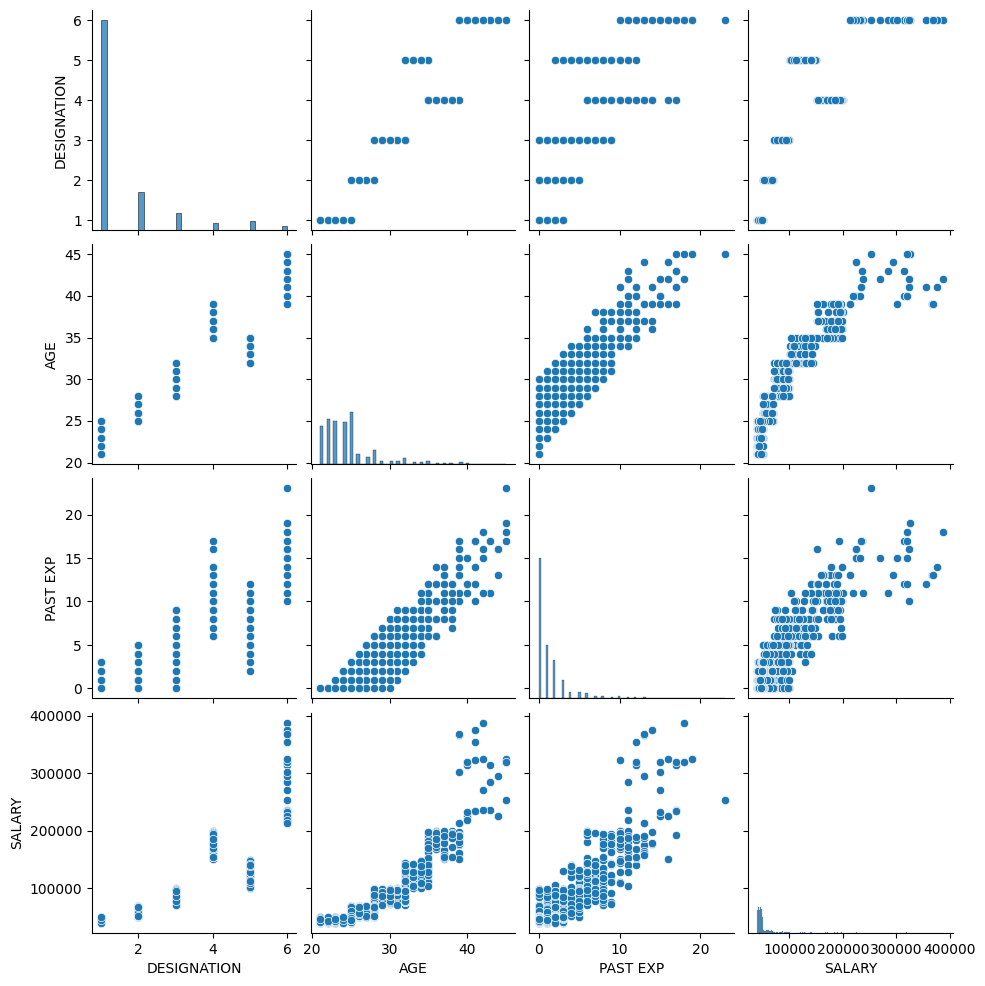

In [ ]:
sns.pairplot(df[['DESIGNATION','AGE','PAST EXP','SALARY']])

plt.show()

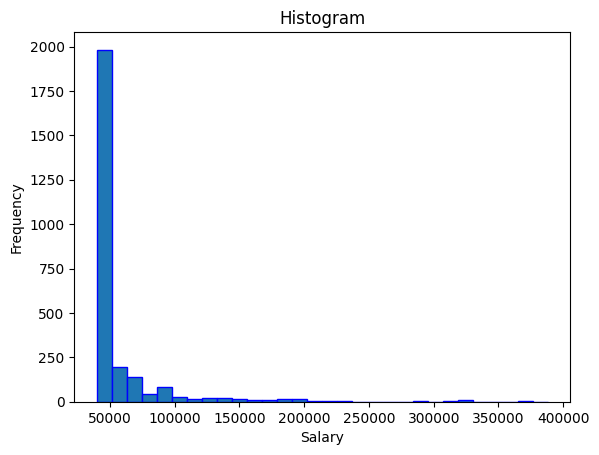

In [17]:
import matplotlib.pyplot as plt

plt.hist(df['SALARY'], bins = 30, edgecolor = "blue")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()

In [ ]:
X = df[['DESIGNATION','AGE','PAST EXP','RATINGS','LEAVES USED']]
Y = df[['SALARY']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)


(2632, 5)
(1974, 5)
(658, 5)


In [ ]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)


(2632, 1)
(1974, 1)
(658, 1)


In [ ]:
# def plot_insights(model, title):
#   train_pred = model.predict(X_train)

#   plt.subplot(1, 2, 1)
#   plt.scatter(X_train, Y_train, color = "green", label = "Actual")
#   plt.plot(X_train, train_pred, color = "red", label = "Predicted")
#   plt.title(f"Prediction on Training data for {title}")
#   plt.xlabel("Features")
#   plt.ylabel("Salary")

#   test_pred = model.predict(X_test)

#   plt.subplot(1, 2, 2)
#   plt.scatter(X_test, Y_test, color = "green", label = "Actual")
#   plt.plot(X_test, test_pred, color = "red", label = "Predicted")
#   plt.title(f"Prediction on Testing data for {title}")
#   plt.xlabel("Features")
#   plt.ylabel("Salary")

#   plt.tight_layout()
#   plt.show()

In [ ]:
train_scores = []
test_scores = []

In [ ]:
# using Linear Regression Model for Salary Estimation

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # root_mean_squared_error
from sklearn.linear_model import LinearRegression

LR = LinearRegression(fit_intercept = True)
LR.fit(X_train, Y_train)

print("Prediction on Training Data: ")
train_pred = LR.predict(X_train)

print(f"Mean Absolute Error: {mean_absolute_error(Y_train, train_pred)}")
print(f"Mean Squared Error: {mean_squared_error(Y_train, train_pred)}")
# print(f"Root Mean Squared Error: {root_mean_squared_error(Y_train, train_pred)}") # rmse not available for this version of sklearn
train_score = r2_score(Y_train, train_pred)
print(f"R2 Score: {train_score:.2f}") # need to focus in this
train_scores.append(train_score)
print()

print("Prediction on Testing Data:")
test_pred = LR.predict(X_test)

print(f"Mean Absolute Error: {mean_absolute_error(Y_test, test_pred)}")
print(f"Mean Squared Error: {mean_squared_error(Y_test, test_pred)}")
# print(f"Root Mean Squared Error: {root_mean_squared_error(Y_test, test_pred)}") # rmse not available for this version of sklearn
test_score = r2_score(Y_test, test_pred)
print(f"R2 Score: {test_score:.2f}")
test_scores.append(test_score)


Prediction on Training Data: 
Mean Absolute Error: 8229.131843823096
Mean Squared Error: 212516152.2053933
R2 Score: 0.83

Prediction on Testing Data:
Mean Absolute Error: 8951.631613802105
Mean Squared Error: 280873082.582143
R2 Score: 0.83


In [ ]:
# using Ridge regression model

from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha = 1.0)
ridge_model.fit(X_train, Y_train)

print("Prediction on Training Data: ")
train_pred = ridge_model.predict(X_train)

print(f"Mean Absolute Error: {mean_absolute_error(Y_train, train_pred)}")
print(f"Mean Squared Error: {mean_squared_error(Y_train, train_pred)}")
# print(f"Root Mean Squared Error: {root_mean_squared_error(Y_train, train_pred)}") # rmse not available for this version of sklearn
train_score = r2_score(Y_train, train_pred)
print(f"R2 Score: {train_score:.2f}") # need to focus in this
train_scores.append(train_score)
print()

print("Prediction on Testing Data:")
test_pred = ridge_model.predict(X_test)

print(f"Mean Absolute Error: {mean_absolute_error(Y_test, test_pred)}")
print(f"Mean Squared Error: {mean_squared_error(Y_test, test_pred)}")
# print(f"Root Mean Squared Error: {root_mean_squared_error(Y_test, test_pred)}") # rmse not available for this version of sklearn
test_score = r2_score(Y_test, test_pred)
print(f"R2 Score: {test_score:.2f}")
test_scores.append(test_score)


Prediction on Training Data: 
Mean Absolute Error: 8234.191724272172
Mean Squared Error: 212516579.10071814
R2 Score: 0.83

Prediction on Testing Data:
Mean Absolute Error: 8956.795882381539
Mean Squared Error: 280929571.42785925
R2 Score: 0.83


In [ ]:
# using Lasso regresson model

from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha = 0.1)
lasso_model.fit(X_train, Y_train)

print("Prediction on Training Data: ")
train_pred = lasso_model.predict(X_train)

print(f"Mean Absolute Error: {mean_absolute_error(Y_train, train_pred)}")
print(f"Mean Squared Error: {mean_squared_error(Y_train, train_pred)}")
# print(f"Root Mean Squared Error: {root_mean_squared_error(Y_train, train_pred)}") # rmse not available for this version of sklearn
train_score = r2_score(Y_train, train_pred)
print(f"R2 Score: {train_score:.2f}") # need to focus in this
train_scores.append(train_score)
print()

print("Prediction on Testing Data:")
test_pred = lasso_model.predict(X_test)

print(f"Mean Absolute Error: {mean_absolute_error(Y_test, test_pred)}")
print(f"Mean Squared Error: {mean_squared_error(Y_test, test_pred)}")
# print(f"Root Mean Squared Error: {root_mean_squared_error(Y_test, test_pred)}") # rmse not available for this version of sklearn
test_score = r2_score(Y_test, test_pred)
print(f"R2 Score: {test_score:.2f}")
test_scores.append(test_score)


Prediction on Training Data: 
Mean Absolute Error: 8229.168354756715
Mean Squared Error: 212516152.24778083
R2 Score: 0.83

Prediction on Testing Data:
Mean Absolute Error: 8951.66615162714
Mean Squared Error: 280873707.6441474
R2 Score: 0.83


In [ ]:
# Using Decision Tree Regressor model

from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor()
DTR.fit(X_train, Y_train)

print("Prediction on Training Data: ")
train_pred = DTR.predict(X_train)

print(f"Mean Absolute Error: {mean_absolute_error(Y_train, train_pred)}")
print(f"Mean Squared Error: {mean_squared_error(Y_train, train_pred)}")
# print(f"Root Mean Squared Error: {root_mean_squared_error(Y_train, train_pred)}") # rmse not available for this version of sklearn
train_score = r2_score(Y_train, train_pred)
print(f"R2 Score: {train_score:.2f}") # need to focus in this
train_scores.append(train_score)
print()

print("Prediction on Testing Data:")
test_pred = DTR.predict(X_test)

print(f"Mean Absolute Error: {mean_absolute_error(Y_test, test_pred)}")
print(f"Mean Squared Error: {mean_squared_error(Y_test, test_pred)}")
# print(f"Root Mean Squared Error: {root_mean_squared_error(Y_test, test_pred)}") # rmse not available for this version of sklearn
test_score = r2_score(Y_test, test_pred)
print(f"R2 Score: {test_score:.2f}")
test_scores.append(test_score)


Prediction on Training Data: 
Mean Absolute Error: 1452.191621783035
Mean Squared Error: 4694200.339663222
R2 Score: 1.00

Prediction on Testing Data:
Mean Absolute Error: 5341.392227693785
Mean Squared Error: 118800205.4586462
R2 Score: 0.93


In [ ]:
# using Support Vector Regressor model

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

svr_model = SVR(epsilon = 0.1, kernel = "rbf", C = 1)
svr_model.fit(X_train_scaled, Y_train.values.ravel())

print("Prediction on Training Data: ")
train_pred = svr_model.predict(X_train_scaled)

print(f"Mean Absolute Error: {mean_absolute_error(Y_train, train_pred)}")
print(f"Mean Squared Error: {mean_squared_error(Y_train, train_pred)}")
# print(f"Root Mean Squared Error: {root_mean_squared_error(Y_train, train_pred)}") # rmse not available for this version of sklearn
train_score = r2_score(Y_train, train_pred)
print(f"R2 Score: {abs(train_score):.2f}") # need to focus in this
train_scores.append(abs(train_score))
print()

print("Prediction on Testing Data:")
test_pred = svr_model.predict(X_test_scaled)

print(f"Mean Absolute Error: {mean_absolute_error(Y_test, test_pred)}")
print(f"Mean Squared Error: {mean_squared_error(Y_test, test_pred)}")
# print(f"Root Mean Squared Error: {root_mean_squared_error(Y_test, test_pred)}") # rmse not available for this version of sklearn
test_score = r2_score(Y_test, test_pred)
print(f"R2 Score: {abs(test_score):.2f}")
test_scores.append(abs(test_score))


Prediction on Training Data: 
Mean Absolute Error: 14086.027078408151
Mean Squared Error: 1361284014.972429
R2 Score: 0.09

Prediction on Testing Data:
Mean Absolute Error: 16307.09156660644
Mean Squared Error: 1840374525.955357
R2 Score: 0.09


In [ ]:
# Using Random Forest Regressor Model

from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators = 100)
RFR.fit(X_train, Y_train.values.ravel())

print("Prediction on Training Data: ")
train_pred = RFR.predict(X_train)

print(f"Mean Absolute Error: {mean_absolute_error(Y_train, train_pred)}")
print(f"Mean Squared Error: {mean_squared_error(Y_train, train_pred)}")
# print(f"Root Mean Squared Error: {root_mean_squared_error(Y_train, train_pred)}") # rmse not available for this version of sklearn
train_score = r2_score(Y_train, train_pred)
print(f"R2 Score: {train_score:.2f}") # need to focus in this
train_scores.append(train_score)
print()

print("Prediction on Testing Data:")
test_pred = RFR.predict(X_test)

print(f"Mean Absolute Error: {mean_absolute_error(Y_test, test_pred)}")
print(f"Mean Squared Error: {mean_squared_error(Y_test, test_pred)}")
# print(f"Root Mean Squared Error: {root_mean_squared_error(Y_test, test_pred)}") # rmse not available for this version of sklearn
test_score = r2_score(Y_test, test_pred)
print(f"R2 Score: {test_score:.2f}")
test_scores.append(test_score)


Prediction on Training Data: 
Mean Absolute Error: 2321.513165454169
Mean Squared Error: 12612496.289754538
R2 Score: 0.99

Prediction on Testing Data:
Mean Absolute Error: 4406.853469108203
Mean Squared Error: 60496635.17049809
R2 Score: 0.96


In [ ]:
# Using Gradient Boosting Regressor Model

from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(n_estimators = 100)
GBR.fit(X_train, Y_train.values.ravel())

print("Prediction on Training Data: ")
train_pred = GBR.predict(X_train)

print(f"Mean Absolute Error: {mean_absolute_error(Y_train, train_pred)}")
print(f"Mean Squared Error: {mean_squared_error(Y_train, train_pred)}")
# print(f"Root Mean Squared Error: {root_mean_squared_error(Y_train, train_pred)}") # rmse not available for this version of sklearn
train_score = r2_score(Y_train, train_pred)
print(f"R2 Score: {train_score:.2f}") # need to focus in this
train_scores.append(train_score)
print()

print("Prediction on Testing Data:")
test_pred = GBR.predict(X_test)

print(f"Mean Absolute Error: {mean_absolute_error(Y_test, test_pred)}")
print(f"Mean Squared Error: {mean_squared_error(Y_test, test_pred)}")
# print(f"Root Mean Squared Error: {root_mean_squared_error(Y_test, test_pred)}") # rmse not available for this version of sklearn
test_score = r2_score(Y_test, test_pred)
print(f"R2 Score: {test_score:.2f}")
test_scores.append(test_score)

Prediction on Training Data: 
Mean Absolute Error: 3531.467768567189
Mean Squared Error: 23487013.286026735
R2 Score: 0.98

Prediction on Testing Data:
Mean Absolute Error: 4338.771693018249
Mean Squared Error: 57945826.237599194
R2 Score: 0.97


In [ ]:
# Using K Neighbors Regressor Model

from sklearn.neighbors import KNeighborsRegressor

KNR = KNeighborsRegressor(n_neighbors = 3)
KNR.fit(X_train, Y_train)

print("Prediction on Training Data: ")
train_pred = KNR.predict(X_train)

print(f"Mean Absolute Error: {mean_absolute_error(Y_train, train_pred)}")
print(f"Mean Squared Error: {mean_squared_error(Y_train, train_pred)}")
# print(f"Root Mean Squared Error: {root_mean_squared_error(Y_train, train_pred)}") # rmse not available for this version of sklearn
train_score = r2_score(Y_train, train_pred)
print(f"R2 Score: {train_score:.2f}") # need to focus in this
train_scores.append(train_score)
print()

print("Prediction on Testing Data:")
test_pred = KNR.predict(X_test)

print(f"Mean Absolute Error: {mean_absolute_error(Y_test, test_pred)}")
print(f"Mean Squared Error: {mean_squared_error(Y_test, test_pred)}")
# print(f"Root Mean Squared Error: {root_mean_squared_error(Y_test, test_pred)}") # rmse not available for this version of sklearn
test_score = r2_score(Y_test, test_pred)
print(f"R2 Score: {test_score:.2f}")
test_scores.append(test_score)

Prediction on Training Data: 
Mean Absolute Error: 3699.433975008443
Mean Squared Error: 56284472.20533603
R2 Score: 0.95

Prediction on Testing Data:
Mean Absolute Error: 5514.739108409321
Mean Squared Error: 149138512.12715298
R2 Score: 0.91


In [ ]:
# Using XG Boost Regressor Model

from xgboost import XGBRegressor

XGBR = XGBRegressor(n_estimators = 100)
XGBR.fit(X_train, Y_train)

print("Prediction on Training Data: ")
train_pred = XGBR.predict(X_train)

print(f"Mean Absolute Error: {mean_absolute_error(Y_train, train_pred)}")
print(f"Mean Squared Error: {mean_squared_error(Y_train, train_pred)}")
# print(f"Root Mean Squared Error: {root_mean_squared_error(Y_train, train_pred)}") # rmse not available for this version of sklearn
train_score = r2_score(Y_train, train_pred)
print(f"R2 Score: {train_score:.2f}") # need to focus in this
train_scores.append(train_score)
print()

print("Prediction on Testing Data:")
test_pred = XGBR.predict(X_test)

print(f"Mean Absolute Error: {mean_absolute_error(Y_test, test_pred)}")
print(f"Mean Squared Error: {mean_squared_error(Y_test, test_pred)}")
# print(f"Root Mean Squared Error: {root_mean_squared_error(Y_test, test_pred)}") # rmse not available for this version of sklearn
test_score = r2_score(Y_test, test_pred)
print(f"R2 Score: {test_score:.2f}")
test_scores.append(test_score)

Prediction on Training Data: 
Mean Absolute Error: 1975.7746287677305
Mean Squared Error: 6270987.865371936
R2 Score: 0.99

Prediction on Testing Data:
Mean Absolute Error: 4480.390987129559
Mean Squared Error: 70530930.81435166
R2 Score: 0.96


In [ ]:
train_scores

[0.8297990549296556,
 0.8297987130357007,
 0.829799054895708,
 0.9962404865424628,
 0.09023160570653488,
 0.9898988440834477,
 0.98118960927592,
 0.9549226246441959,
 0.9949776614618008]

In [ ]:
test_scores

[0.833254733153626,
 0.8332211975525416,
 0.8332543620745259,
 0.9294721595302297,
 0.09257084590136211,
 0.9640851039121476,
 0.9655994366929186,
 0.911461287877451,
 0.958128067056327]

In [ ]:
train_scores_percent = [f"{x * 100:.2f}%" for x in train_scores]
print(train_scores_percent)

['82.98%', '82.98%', '82.98%', '99.62%', '9.02%', '98.99%', '98.12%', '95.49%', '99.50%']


In [ ]:
test_scores_percent = [f"{x * 100:.2f}%" for x in test_scores]
print(test_scores_percent)

['83.33%', '83.32%', '83.33%', '92.95%', '9.26%', '96.41%', '96.56%', '91.15%', '95.81%']


In [ ]:
models = ["Linear Regression", "Ridge Regression", "Lasso Regression", "Decision Tree Regressor", "Support Vector Regressor", "Random Forest Regressor", "Gradient Boosting Regressor", "K-Neighbors Regressor", "XG Boosting Regressor"]
models

['Linear Regression',
 'Ridge Regression',
 'Lasso Regression',
 'Decision Tree Regressor',
 'Support Vector Regressor',
 'Random Forest Regressor',
 'Gradient Boosting Regressor',
 'K-Neighbors Regressor',
 'XG Boosting Regressor']

In [ ]:
Ov_Un = []

for i in range(0, len(train_scores)):
  j = i
  x = train_scores[i]
  y = test_scores[j]

  if(abs(x - y) == 5):
    Ov_Un.append(True)
  else:
    Ov_Un.append(False)

In [ ]:
len(Ov_Un)

9

In [ ]:
Ov_Un

[False, False, False, False, False, False, False, False, False]

In [ ]:
data = {
    "Regression Models": models,
    "Training Score": train_scores_percent,
    "Testing Score": test_scores_percent,
    "Overfitting/Underfiting": Ov_Un
}

results = pd.DataFrame(data)

results

,Regression Models,Training Score,Testing Score,Overfitting/Underfiting
0,Linear Regression,82.98%,83.33%,False
1,Ridge Regression,82.98%,83.32%,False
2,Lasso Regression,82.98%,83.33%,False
3,Decision Tree Regressor,99.62%,92.95%,False
4,Support Vector Regressor,9.02%,9.26%,False
5,Random Forest Regressor,98.99%,96.41%,False
6,Gradient Boosting Regressor,98.12%,96.56%,False
7,K-Neighbors Regressor,95.49%,91.15%,False
8,XG Boosting Regressor,99.50%,95.81%,False


In [ ]:
# selecting Random Forest and Gradient Boosting models
# saving them as pickle file

import pickle

with open(os.path.join(WORKING_DIR,"RFModel.pkl"), 'wb') as rf:
  pickle.dump(RFR, rf)

with open(os.path.join(WORKING_DIR,"GBModel.pkl"),'wb') as gb:
  pickle.dump(GBR, gb)